In [121]:
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()
df = pd.read_csv('./dws_dsc_customer_opportunity_monthly_kpi_1.csv')
op = pd.read_csv('dwd_dsc_d365_opportunity_df.csv', sep = '\001')
df.columns = [re.sub('\w+\.', '', i) for i in list(df.columns)]
op.columns = [re.sub('\w+\.', '', i) for i in list(op.columns)]
df = df.fillna(0)
# df.columns
df['if_cooped'] = 0
df['if_cooped'] = df['if_cooped'].where(df['contract_signed_opportunity_num'] < 1, 1) # 今年有没合作。
cus_bf_21 = op[(op['createdon'] < '2021-11-01') & (op['milestone'] == 'Contract Signed')]['account_name_en'].unique()
cus_bf_21 = list(cus_bf_21)
cus_af_21 = list(df['customer_name'].unique())
df['old_cust'] = df['customer_name'].isin(cus_bf_21)
# df.to_csv('./data_down/dws_dsc_customer_opportunity_monthly_kpi_1.csv', index = None, encoding='utf_8_sig')

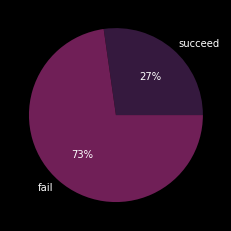

In [126]:
colors = sns.color_palette('rocket')[0:5]
plt1 = sum(df['contract_signed_opportunity_num']) / sum(df['total_opportunity_num']) # 整体的商机成功率.a

#create pie chart
plt.pie(x = [plt1, 1 - plt1], labels = ['succeed', 'fail'], colors = colors, autopct='%.0f%%')
plt.show()


In [113]:
df.query("old_cust == 1 & if_cooped == 1 & total_opportunity_num > 0").shape[0] / df.query("old_cust == 1 & total_opportunity_num > 0").shape[0] 
# 0.592375366568915 旧客户留存率。

0.592375366568915

In [118]:
[df.query("old_cust == 1")['total_opportunity_num'].sum(), df.query("old_cust == 1")['total_opportunity_num'].sum() / sum(df['total_opportunity_num'])]

# [967, 0.6863023420865862] 已有客户今年总商机。 已有客户商机成功率。

[967, 0.6863023420865862]

In [120]:
# df['contract_signed_opportunity_num'].value_counts() # 4

In [77]:
pd.Series(op.columns).str.extract('(mile.+)').dropna()

,0
22,milestone


In [89]:
[len(set(np.intersect1d(cus_bf_21, cus_af_21))), len(cus_af_21)]  
"""# [341, 717]  今年出现的过往的客户 vs 今年的所有"""

[341, 717]

In [87]:
df[df['contract_signed_opportunity_num'] > 0].shape # 238 客户今年签署了合同;

(238, 46)